In [1]:
# Khai báo sử dụng hàm sobel
from matplotlib import pyplot as plt
from skimage.filters import sobel
from skimage import color
import os




In [35]:

path = os.path.abspath("video/san_pham.mp4")
#video = plt.imread(path)
path1 = os.path.abspath("image/vo.jpg")
image = plt.imread(path1)

In [ ]:
import cv2
cap = cv2.VideoCapture(path)

frame_index = 100  # Ví dụ: khung hình thứ 1000
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()

if ret:
    cv2.imshow('Frame {}'.format(frame_index), frame)
    cv2.waitKey(0)
    
else:
    print('Không thể đọc khung hình thứ {} từ video.'.format(frame_index))

In [12]:
# hiển thị kết quả ảnh gốc và ảnh đã được lọc cạnh
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

In [14]:
def show_image(image, title='Image', cmap_type='gray'):  
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)  
    plt.axis('off')  
    plt.show()

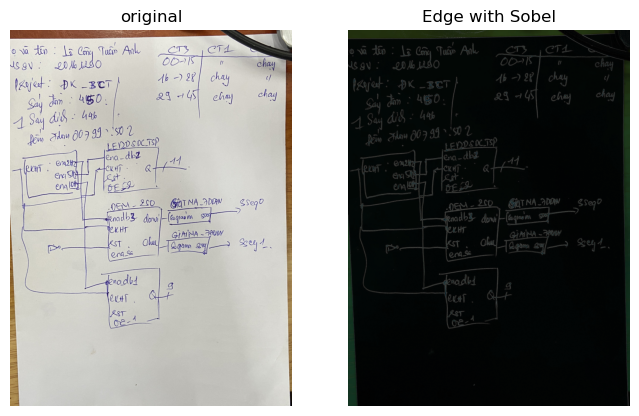

In [29]:
# Chuyển ảnh gốc thành ảnh xám
image_gray =color.rgb2gray(image)
# áp dụng hàm sobel để lọc cạnh
edge_sobel = sobel(image)
plot_comparison(image, edge_sobel, "Edge with Sobel")

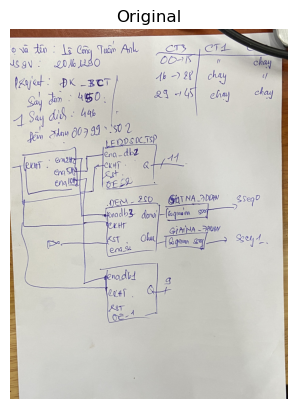

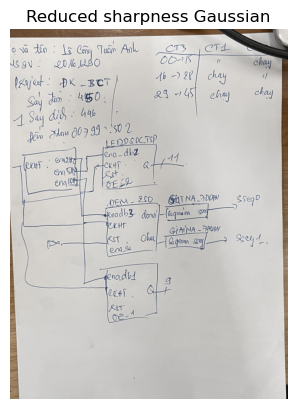

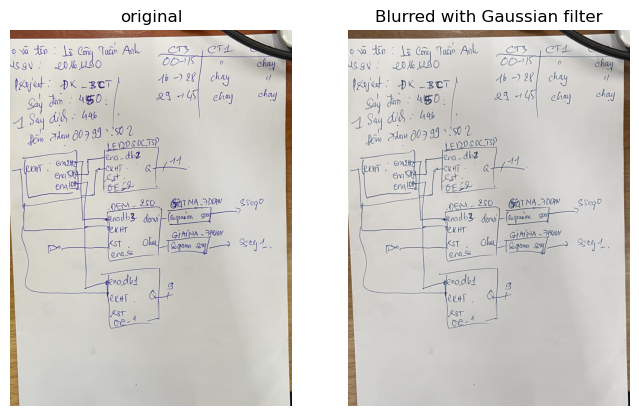

In [22]:
#Bài 2
# Khai báo sử dụng bộ lọc Gaussian
from skimage.filters import gaussian
# Áp dụng bộ lọc 
gaussian_image = gaussian(image,channel_axis=True)
# Hiển thị ảnh gốc và ảnh kết quả 
show_image(image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")
# Đánh giá mức độ nhiễu của ảnh
plot_comparison(image, gaussian_image, "Blurred with Gaussian filter")

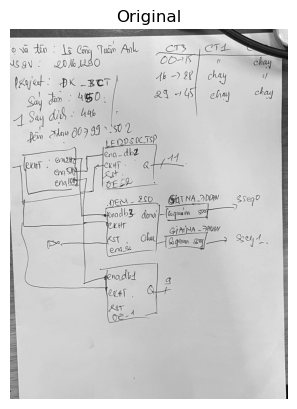

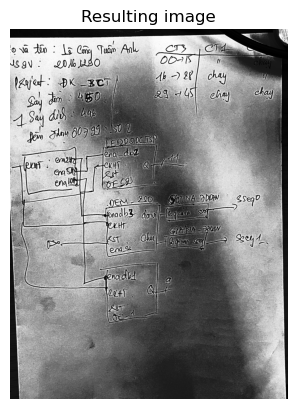

In [30]:
#Bài 4
# Khai báo các thư viện cần dùng
from skimage import exposure
# Tiến hành cân bằng lược đồ mức xám
image_eq = exposure.equalize_hist(image_gray)
# hiển thị ảnh gốc và ảnh kết quả
show_image(image_gray, 'Original')
show_image(image_eq, 'Resulting image')

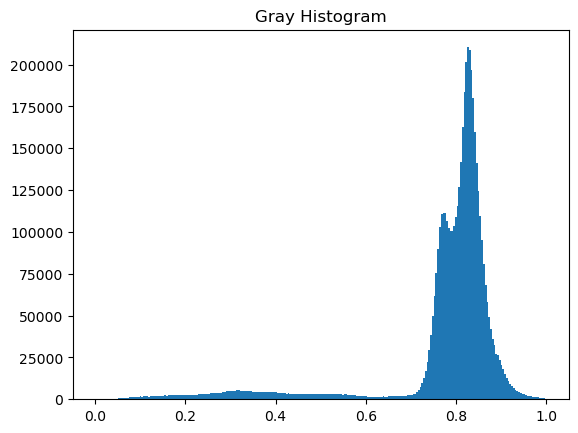

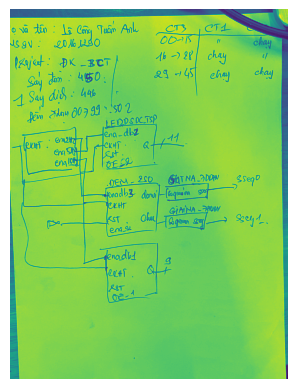

In [34]:
#Bài 5
# khai báo thư viện cần thiết

# Đọc ảnh 
#Thực hiện cân bằng lược đồ mức xám cho ảnh DICOM
plt.hist(image_gray.ravel(), bins=256)
# Đặt tên cho khung hình và hiển thị
plt.title('Gray Histogram')
plt.figure()
plt.axis('off')  
plt.imshow(image_gray)
# chuẩn hóa ảnh DICOM về ngưỡng [0-255]
# Thực hiện cân bằng lược đồ mức xám
# hiển thị và so sánh kết quả

In [ ]:
#Bai 6
# Khai báo các gói thư viện cần thiết
from skimage import data, color
# Tải ảnh gốc

# ứng dụng phương pháp tăng cường cảnh cục bộ để tăng cường độ tương phản của ảnh
adapthist_eq_image =exposure.equalize_adapthist(image, clip_limit=0.03)
# ứng dụng phương pháp tăng cường cảnh truyền thống để tăng 
#cường độ tương phản của ảnh
# Hiển thị kết quả và so sánh
show_image(image)
show_image(adapthist_eq_image, '#adapthist eq image')
show_image(image_eq, 'hist eq image')

In [ ]:
#Bai 7
# Khai báo các thư viện cần thiết
from skimage.transform import rotate,rescale,resize
# đọc ảnh 

# xoay ảnh thẳng đứng so với ảnh gốc
RotatedImage= image
# Tăng kích thước lên 2 lần sử dụng kỹ thuật khử răng cưa\
Zoom_2x_A= rescale(image,2,anti_aliasing=True,multichannel=True)
# tăng kích thước lên 2 lần không sử dụng kỹ thuật khử răng cưa
Zoom_2x_B= rescale(image,2,anti_aliasing=False,multichannel=True)
# Tách một khung ảnh 100*100 cho cả hai trường hợp trên
Crop_A=resize (Zoom_2x_A, (100, 100), anti_aliasing=True)
Crop_B=resize (Zoom_2x_B, (100, 100), anti_aliasing=True)
# hiển thị kết quả và so sánh
plot_comparison(Crop_A,Crop_B,"compare")

In [ ]:
#Bai 8
# Khai báo các thư viện cần sử dụng
from skimage.transform import rescale


# Tăng kích thước ảnh lên 3 lần
Zoom_3x_image = rescale(image,3,anti_aliasing=True,multichannel=True)
# hiển thị ảnh để đánh giá
show_image(image)
show_image(Zoom_3x_image, "3 times enlarged image")

In [ ]:
#Bài 9 
# Khai báo thư viện cần dùng
from skimage.transform import resize
# khai báo chiều dài và chiều rộng của cột sau khi xử lý thay đổi 
kích thước ảnh
height = int(image.shape[0] / 2)
width = int(image.shape[1] / 2)
# Thực hiện thay đổi kích thước ảnh
image_resized = resize(image, (height, width), anti_aliasing=True)
# Hiển thị kết quả và so sánh
show_image(image, 'Original')
show_image(image_resized, 'Resized image')

In [ ]:
# Khai báo thư viện morphology
from skimage import morphology
# điền kín khoảng trống trong nét đứt của chữ R
dilated_image = morphology.binary_dilation(image)
eroded_image = morphology.binary_erosion(dilated_image, selem=selem)
# Thực hiện việc xói mòn các điểm ảnh để loại bỏ những điểm ảnh thừa

eroded_image_shape = morphology.binary_erosion(image, selem=selem)
# Hiển thị kết quả
show_image(image, 'Original')
show_image(eroded_image_shape, 'Eroded image')

In [ ]:
#Khai báo thư viện cần sử dụng
from skimage import morphology
# Giãn nở ảnh
dilated_image = morphology.binary_dilation(image)
# Hiển thị kết quả và so sánh
show_image(image, 'Original')
show_image(dilated_image, 'Dilated image')